___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [71]:
# IMPORTS HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [3]:
# CODE HERE
df = pd.read_csv('Data/Miles_Traveled.csv',index_col=0,parse_dates=True)
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [4]:
df.shape

(588, 1)

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [5]:
# CODE HERE
df.columns = ['Value']

In [6]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

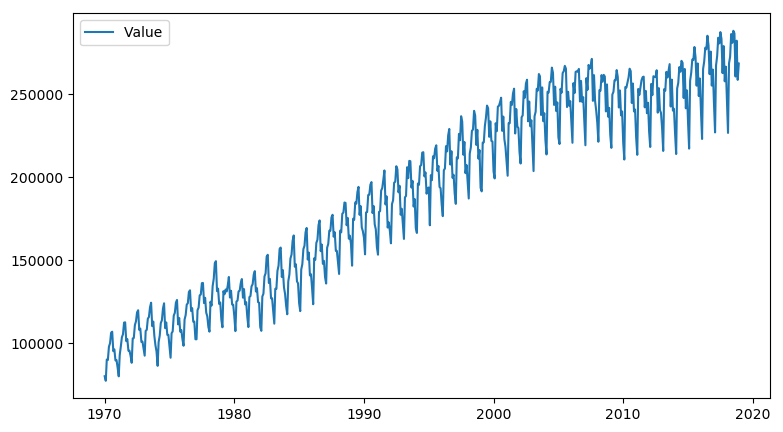

In [16]:
# CODE HERE
plt.figure(figsize=(9,5))
plt.plot(df,label='Value')
plt.legend();

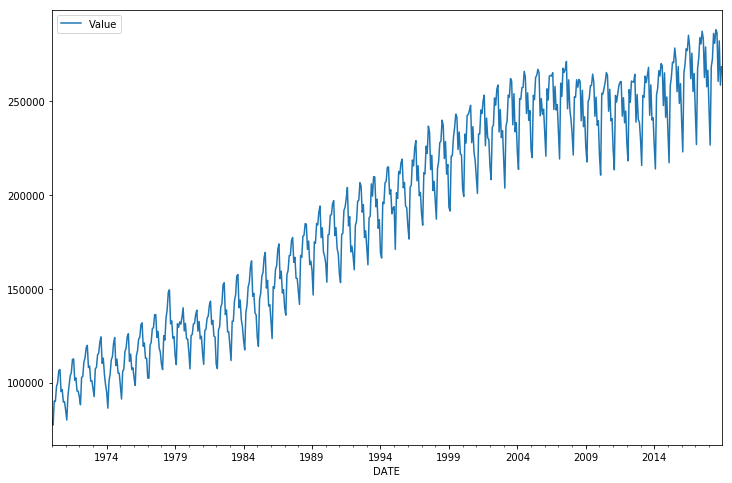

In [19]:
df.index.freq = 'MS'

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [22]:
# CODE HERE
results = seasonal_decompose(df['Value'],model='additive')
results

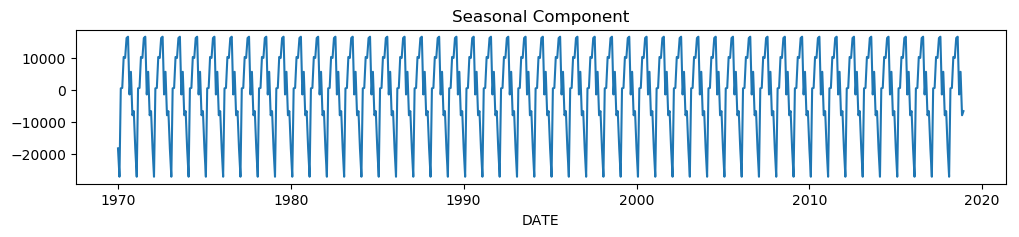

In [29]:
plt.figure(figsize=(12,2))
plt.plot(results.seasonal)
plt.title('Seasonal Component')
plt.xlabel('DATE');

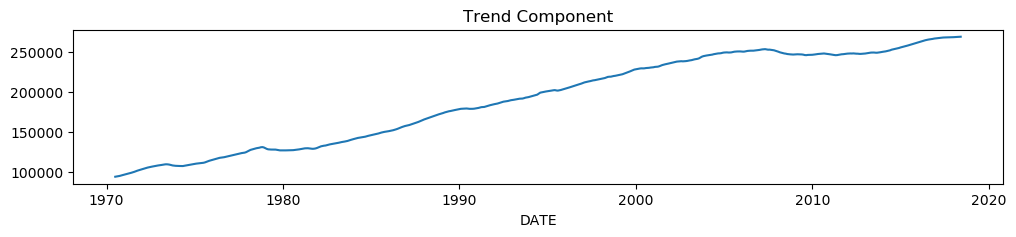

In [30]:
plt.figure(figsize=(12,2))
plt.plot(results.trend)
plt.title('Trend Component')
plt.xlabel('DATE');

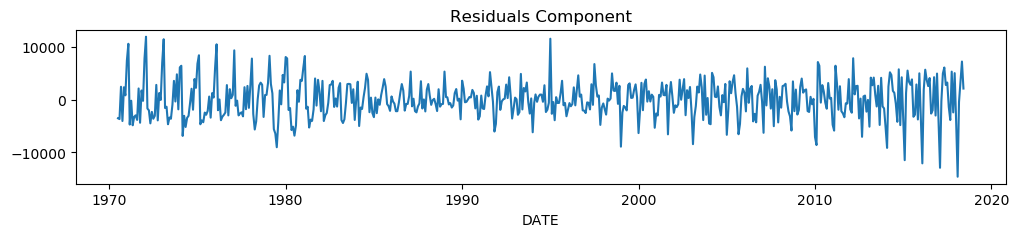

In [31]:
plt.figure(figsize=(12,2))
plt.plot(results.resid)
plt.title('Residuals Component')
plt.xlabel('DATE');

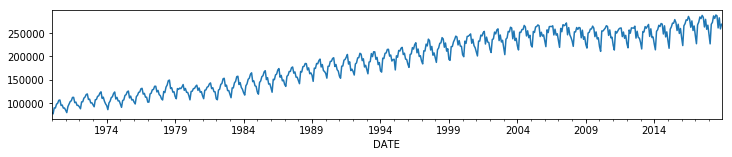

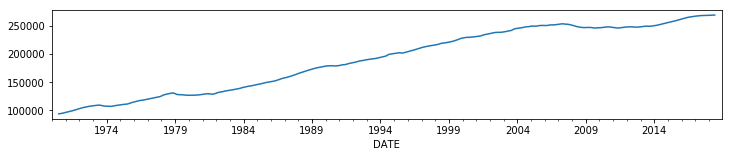

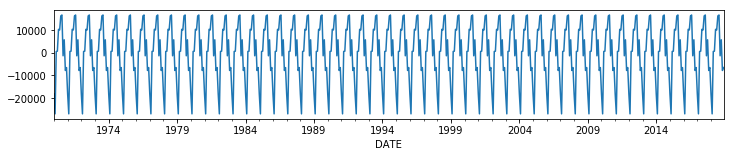

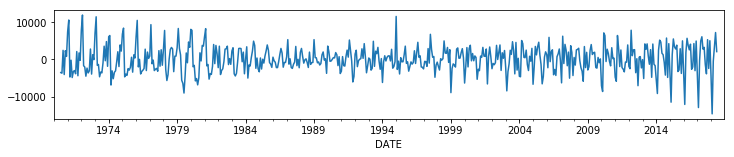

## Train Test Split

**TASK: Figure out the length of the data set**

In [32]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [33]:
# CODE HERE
train = df.iloc[:576]
test = df.iloc[576:]
len(test)

12

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [37]:
# CODE HERE
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
scaled_train = scaler.transform(train)
scaled_train[:5]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801]])

In [39]:
scaled_test = scaler.transform(test)
scaled_test[:5]

array([[0.80158265],
       [0.71089704],
       [0.91013382],
       [0.92916661],
       [0.99438307]])

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [41]:
#CODE HERE
n_inputs = 24
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)
train_generator

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer.**

In [53]:
model = Sequential()
model.add(LSTM(units=150,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='mse',optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [55]:
# CODE HERE
model.fit_generator(train_generator,epochs=25)

Epoch 1/25


D:\Anaconda\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


552/552 [==============================] - 6s 8ms/step - loss: 0.0115
Epoch 2/25
552/552 [==============================] - 4s 7ms/step - loss: 0.0059
Epoch 3/25
552/552 [==============================] - 4s 7ms/step - loss: 0.0067
Epoch 4/25
552/552 [==============================] - 5s 10ms/step - loss: 0.0059
Epoch 5/25
552/552 [==============================] - 7s 13ms/step - loss: 0.0052
Epoch 6/25
552/552 [==============================] - 5s 9ms/step - loss: 0.0048
Epoch 7/25
552/552 [==============================] - 4s 6ms/step - loss: 0.0043
Epoch 8/25
552/552 [==============================] - 5s 9ms/step - loss: 0.0034
Epoch 9/25
552/552 [==============================] - 4s 8ms/step - loss: 0.0024
Epoch 10/25
552/552 [==============================] - 4s 7ms/step - loss: 0.0020
Epoch 11/25
552/552 [==============================] - 4s 7ms/step - loss: 0.0017
Epoch 12/25
552/552 [==============================] - 4s 7ms/step - loss: 0.0014
Epoch 13/25
552/552 [=============

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

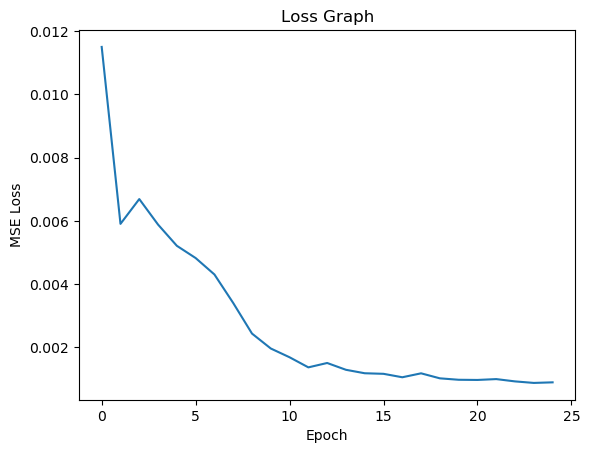

In [56]:
# CODE HERE
plt.plot(range(25),model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Graph')
plt.show();

In [57]:
model.history.history.keys()

dict_keys(['loss'])

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [58]:
# CODE HERE
test_predictions = []
first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1,n_inputs,n_features))

for i in range(len(scaled_test)):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [59]:
test_predictions = np.array(test_predictions)
test_predictions.shape

(12, 1)

In [60]:
test_predictions

array([[0.8162078 ],
       [0.75951797],
       [0.89821696],
       [0.936065  ],
       [0.9755745 ],
       [0.97930604],
       [0.9990801 ],
       [0.9760922 ],
       [0.9168661 ],
       [0.9461944 ],
       [0.8810219 ],
       [0.90034413]], dtype=float32)

In [61]:
true_predictions = scaler.inverse_transform(test_predictions.reshape(-1,1))
true_predictions

array([[248764.83],
       [236865.56],
       [265978.62],
       [273922.97],
       [282216.06],
       [282999.3 ],
       [287149.9 ],
       [282324.72],
       [269893.1 ],
       [276049.16],
       [262369.38],
       [266425.12]], dtype=float32)

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [63]:
# CODE HERE
test_predictions[:len(test)]

array([[0.8162078 ],
       [0.75951797],
       [0.89821696],
       [0.936065  ],
       [0.9755745 ],
       [0.97930604],
       [0.9990801 ],
       [0.9760922 ],
       [0.9168661 ],
       [0.9461944 ],
       [0.8810219 ],
       [0.90034413]], dtype=float32)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [64]:
#CODE HERE
true_predictions[:len(test)]

array([[248764.83],
       [236865.56],
       [265978.62],
       [273922.97],
       [282216.06],
       [282999.3 ],
       [287149.9 ],
       [282324.72],
       [269893.1 ],
       [276049.16],
       [262369.38],
       [266425.12]], dtype=float32)

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [67]:
# CODE HERE
test['Predictions'] = true_predictions
test

D:\Anaconda\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Value,Predictions
DATE,,
2018-01-01,245695.0,248764.828125
2018-02-01,226660.0,236865.562500
2018-03-01,268480.0,265978.625000
2018-04-01,272475.0,273922.968750
2018-05-01,286164.0,282216.062500
2018-06-01,280877.0,282999.312500
2018-07-01,288145.0,287149.906250
2018-08-01,286608.0,282324.718750
2018-09-01,260595.0,269893.093750


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


In [72]:
print("MAE:", mean_absolute_error(test['Value'],test['Predictions']))
print("MSE:", mean_squared_error(test['Value'],test['Predictions']))
print("RMSE:", np.sqrt(mean_squared_error(test.Value,test.Predictions)))

MAE: 4146.962239583333
MSE: 25296796.04095459
RMSE: 5029.592035240492


**TASK: Plot out the test set against your own predicted values.**

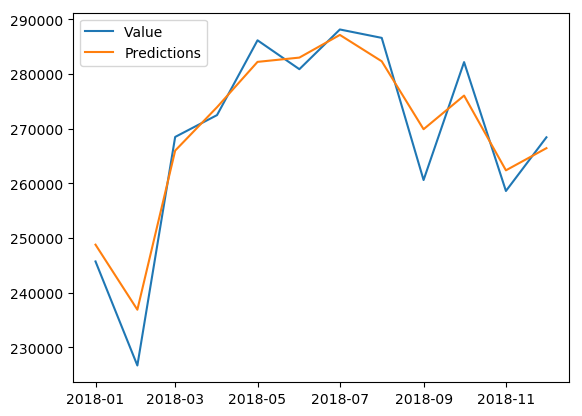

In [70]:
# CODE HERE
plt.plot(test['Value'])
plt.plot(test['Predictions'])
plt.legend();

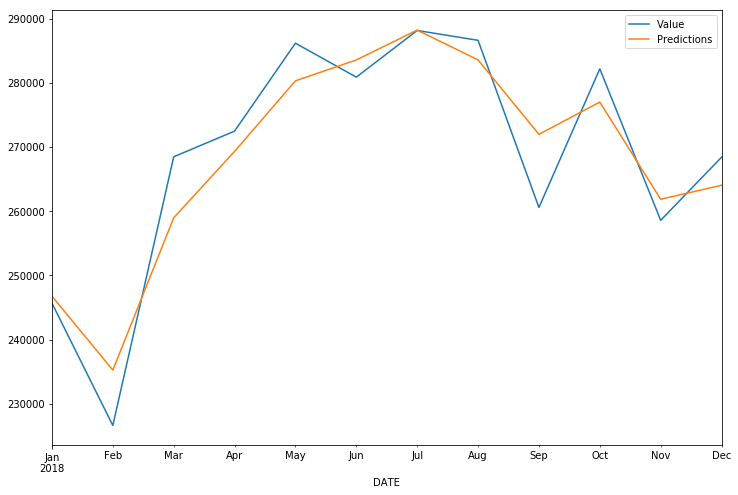

# Saving Models

**TASK: Optional, Save your model!**

In [73]:
model.save('vehicle_miles_travelled_forecaster.h5')

In [74]:
load_model('vehicle_miles_travelled_forecaster.h5').summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
